<a href="https://colab.research.google.com/github/AndrehAguiar/POS-Graduacao-Inteligecia_Artificial-Ciencia_de_Dados/blob/master/ALURA_QuarentenaDados_ENEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 4: Estatísticas no ENEM 2018

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
import numpy as np

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_amostra_enem = pd.read_csv('/content/drive/My Drive/MICRODADOS_ENEM_2018_SAMPLE_43278.csv')
df_amostra_enem.head()

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  ... Q025  Q026 Q027
0  180009327796    2018                  2112209  ...    B     A    A
1  180012890374    2018                  3557105  ...    B     D    D
2  180008223824    2018                  2506301  ...    B     A    E
3  180007859645    2018                  3534807  ...    A     B    A
4  180013499517    2018                  3523107  ...    B     A    A

[5 rows x 137 columns]

In [3]:
df_amostra_enem.describe()

NU_INSCRICAO     NU_ANO  ...  NU_NOTA_REDACAO       Q005
count         137,844.00 137,844.00  ...       103,774.00 137,844.00
mean  180,010,423,553.31   2,018.00  ...           509.13       3.90
std         1,918,950.00       0.00  ...           187.01       1.51
min   180,007,186,686.00   2,018.00  ...             0.00       1.00
25%   180,008,761,760.75   2,018.00  ...           360.00       3.00
50%   180,010,373,993.50   2,018.00  ...           520.00       4.00
75%   180,012,032,768.50   2,018.00  ...           620.00       5.00
max   180,014,002,596.00   2,018.00  ...         1,000.00      20.00

[8 rows x 94 columns]

In [4]:
raw_col_notas = 'NU_NOTA_CN	NU_NOTA_CH	NU_NOTA_LC	NU_NOTA_MT NU_NOTA_REDACAO TP_SEXO'.split()
col_notas = df_amostra_enem[raw_col_notas].dropna()
col_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao', 'genero']
col_notas.head()

ciencias_naturais  ciencias_humanas  ...  redacao  genero
1             523.10            671.30  ...   680.00       M
2             409.20            531.70  ...   600.00       F
3             452.30            505.50  ...   400.00       F
6             428.50            505.20  ...   560.00       F
8             491.80            575.70  ...   660.00       F

[5 rows x 6 columns]

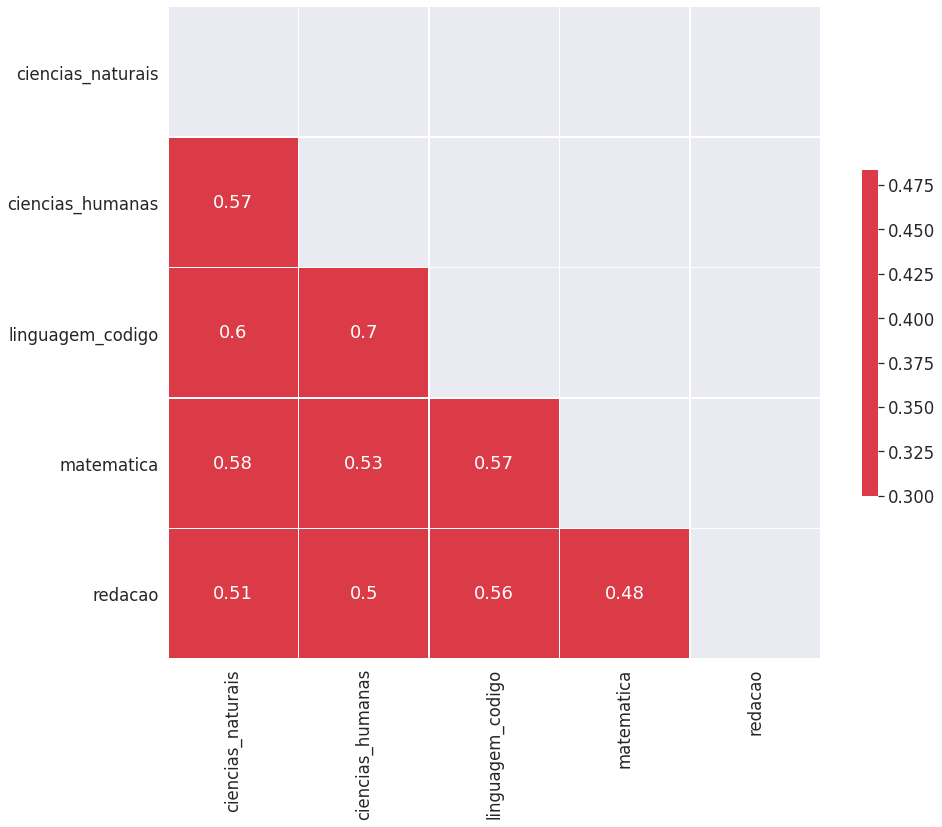

In [5]:
corr = col_notas.corr()
sns.set(font_scale=1.5)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

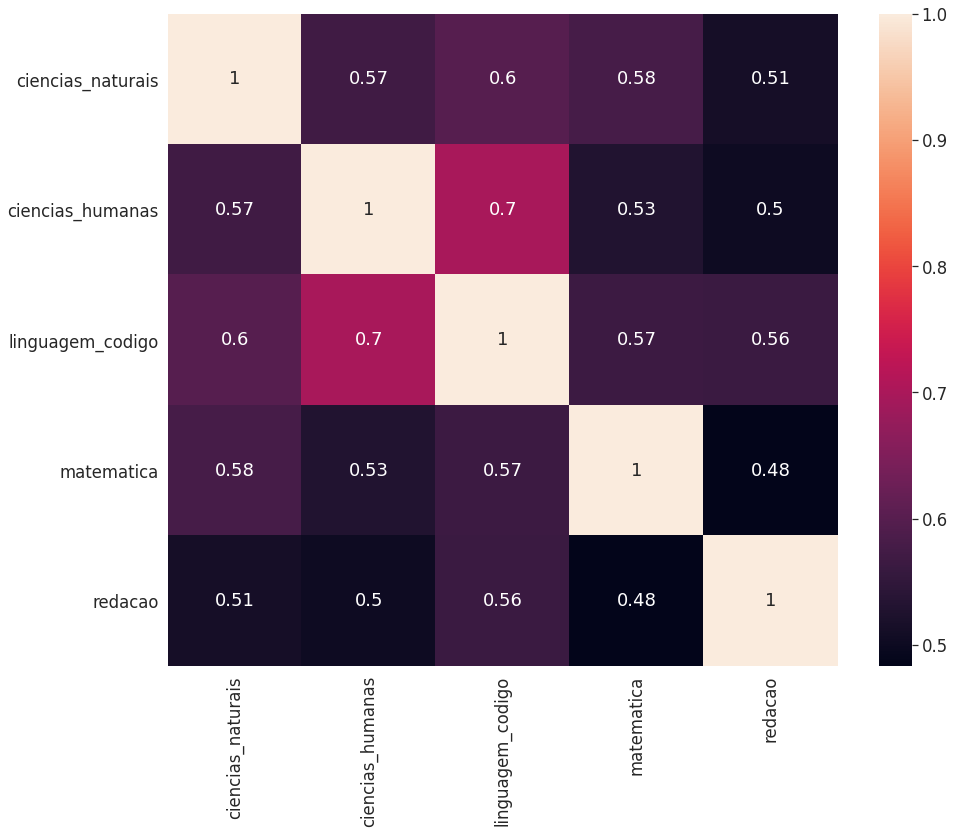

In [6]:
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True)

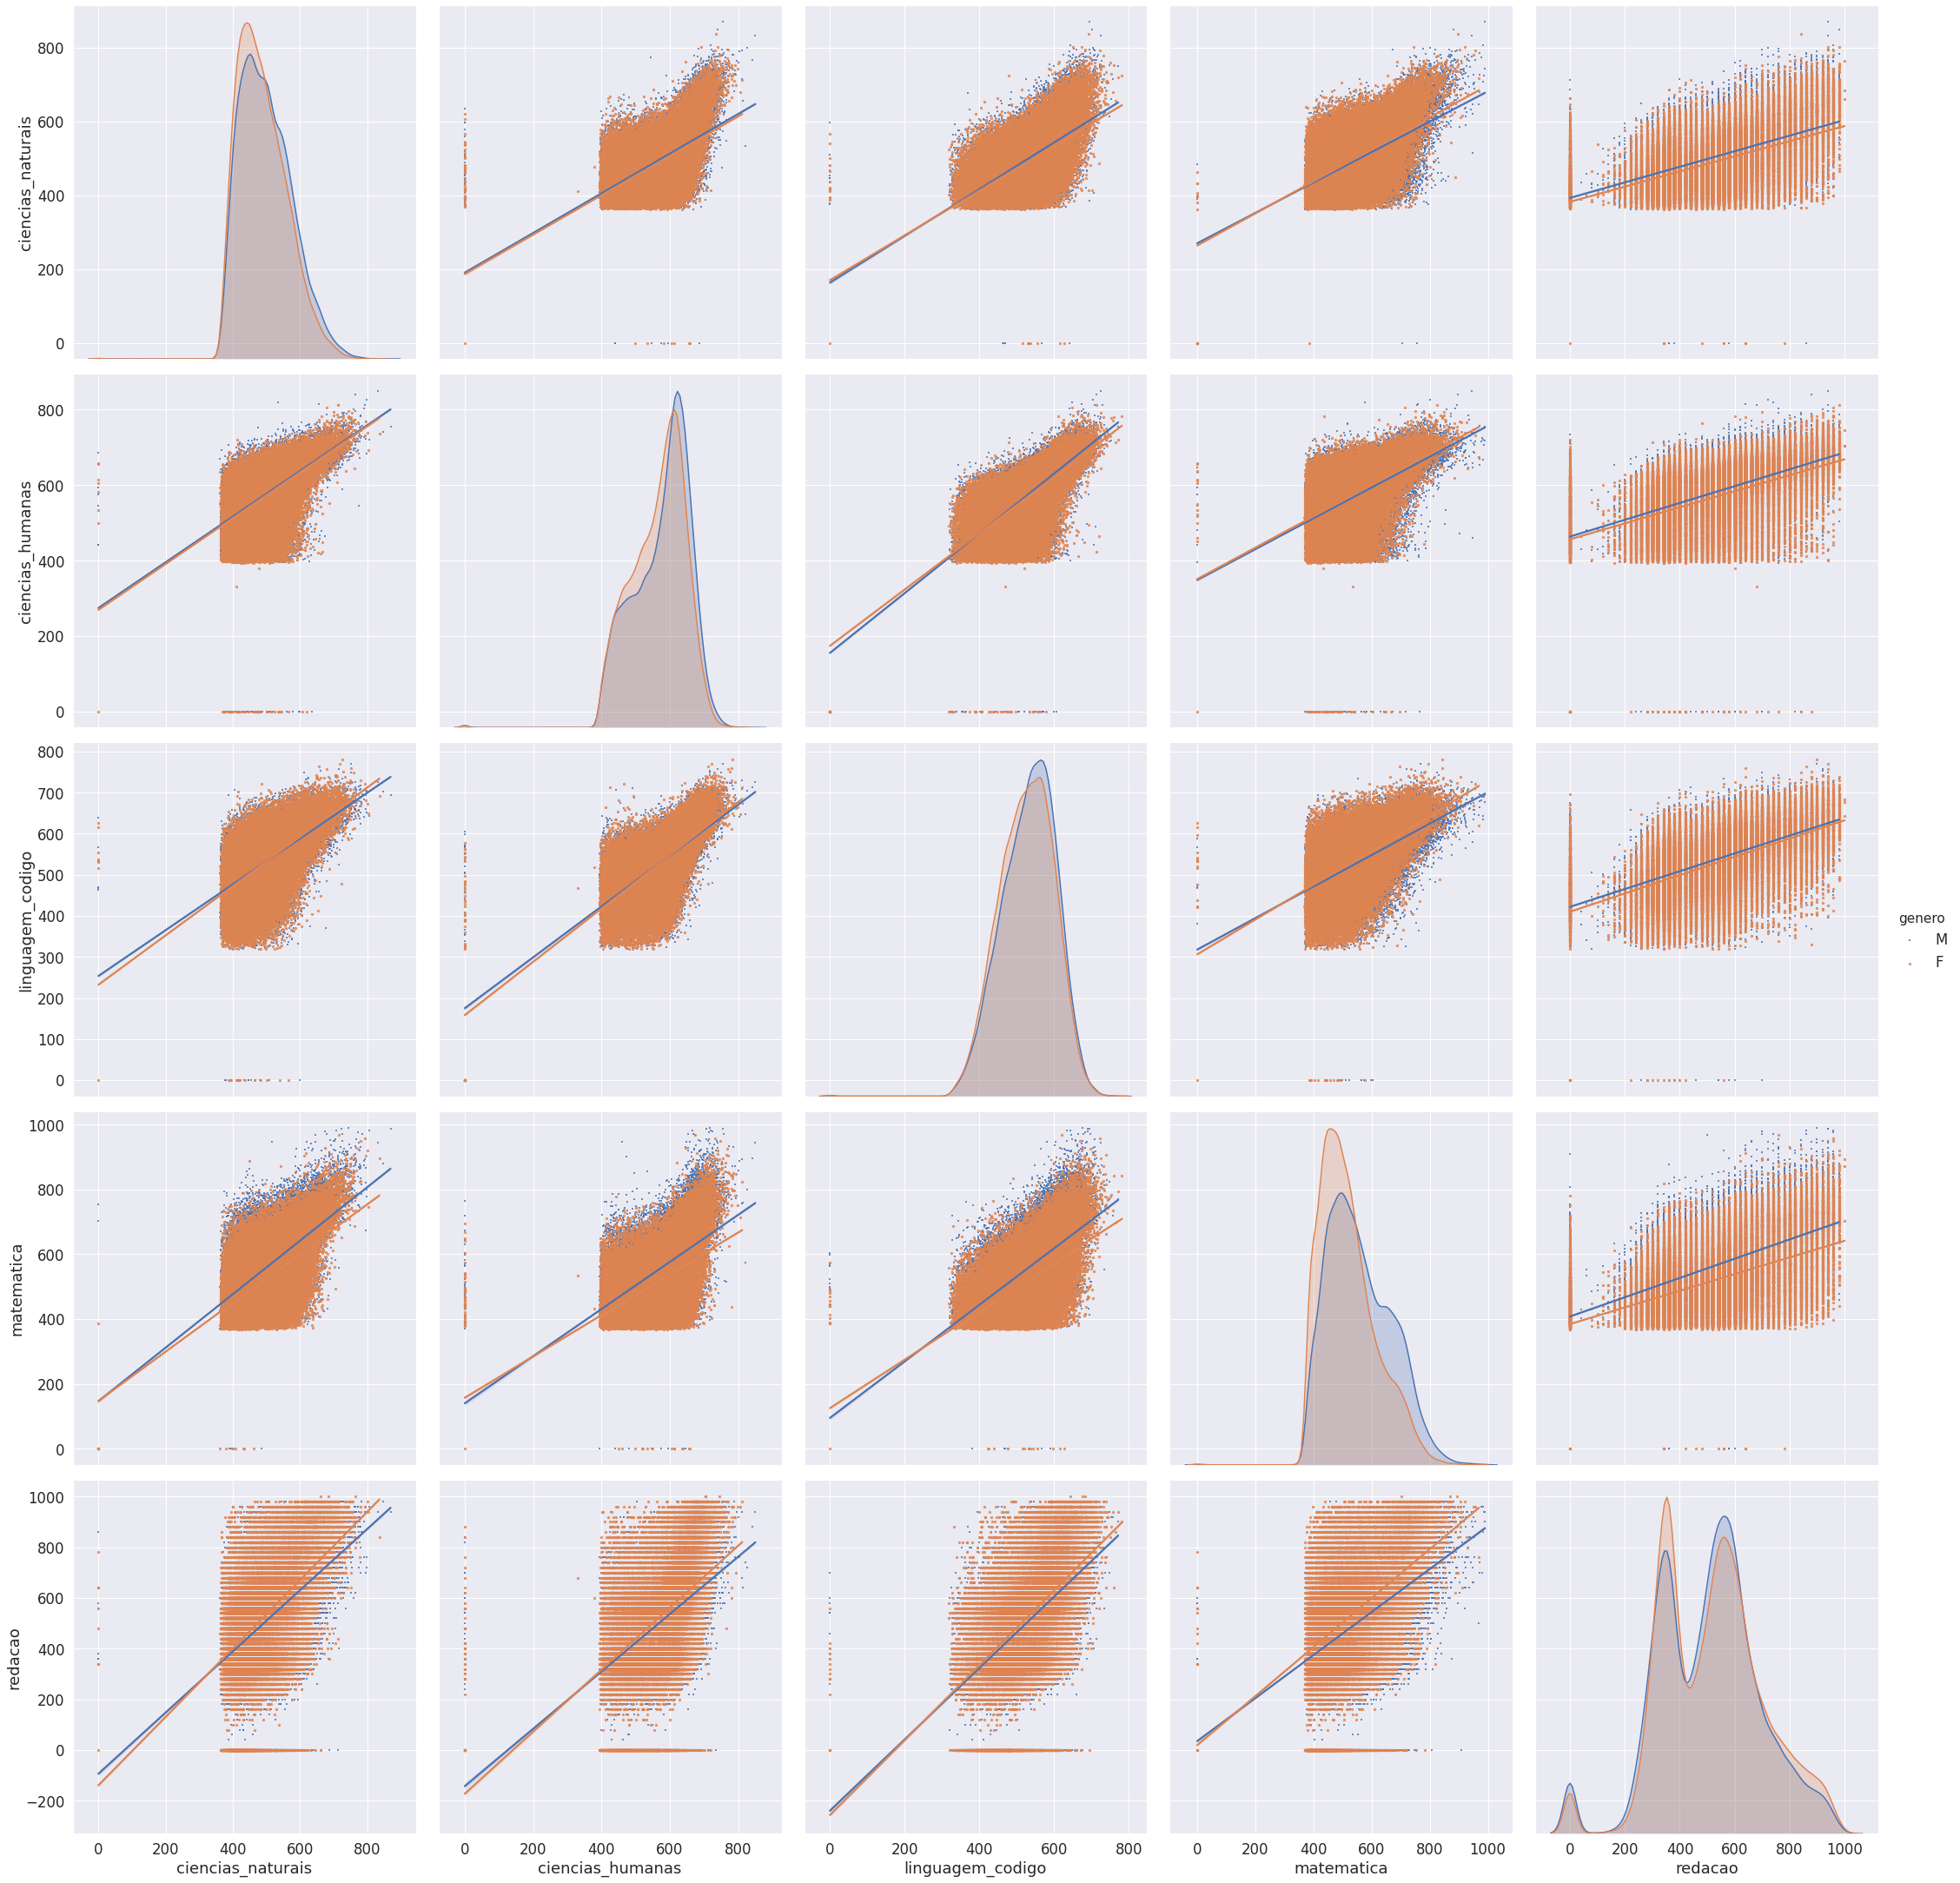

In [8]:
sns.set(font_scale=1.5)
sns.pairplot(col_notas, kind='reg', 
             hue='genero',
             diag_kind='kde',
             height=6, markers=["+", 'o'],
             plot_kws=dict(scatter_kws=dict(s=5)),
             diag_kws=dict(shade=True))
plt.show()

### Desafio 1 da [Thais André](https://twitter.com/thais_tandre)
Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [9]:
#@title Substitui os valores nulos das notas de cada matéria de acordo com a presença em cada prova.
df_preparado_enem = df_amostra_enem.copy()
df_preparado_enem.loc[df_amostra_enem['TP_PRESENCA_CN'].isin([0, 2]), 'NU_NOTA_CN'] = 0
df_preparado_enem.loc[df_amostra_enem['TP_PRESENCA_CH'].isin([0, 2]), 'NU_NOTA_CH'] = 0
df_preparado_enem.loc[df_amostra_enem['TP_PRESENCA_LC'].isin([0, 2]), 'NU_NOTA_LC'] = 0
df_preparado_enem.loc[df_amostra_enem['TP_PRESENCA_MT'].isin([0, 2]), 'NU_NOTA_MT'] = 0
df_preparado_enem.loc[df_amostra_enem['TP_STATUS_REDACAO'].isna(), 'NU_NOTA_REDACAO'] = 0

df_preparado_enem['NU_NOTA_CN	NU_NOTA_CH	NU_NOTA_LC	NU_NOTA_MT	NU_NOTA_REDACAO'.split()].head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO
0        0.00        0.00        0.00        0.00             0.00
1      523.10      671.30      661.60      738.00           680.00
2      409.20      531.70      389.00      438.10           600.00
3      452.30      505.50      448.50      544.90           400.00
4        0.00        0.00        0.00        0.00             0.00

### Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)
A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

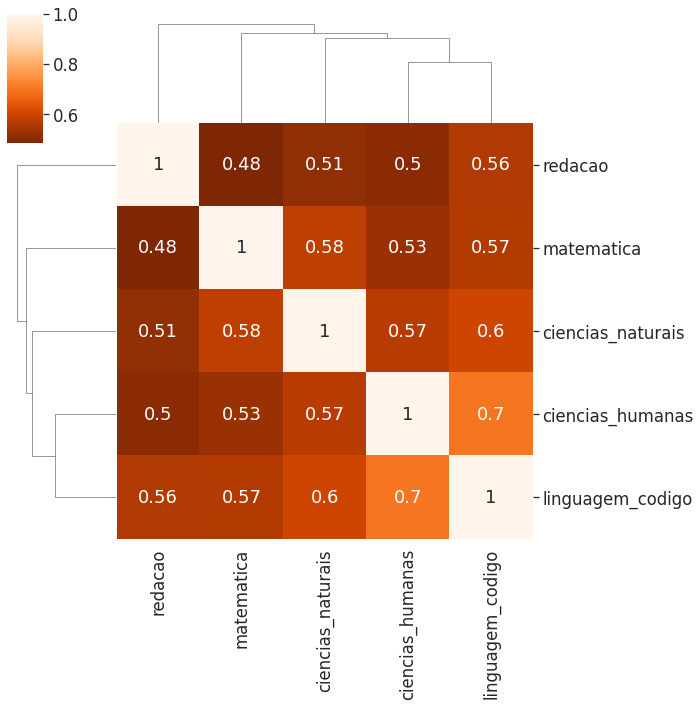

In [10]:
#@title A matriz de correlações abaixo indica as camadas 'hieráquicas' de cada feature. Basicamente a camada mais alta, nesse caso redação, tem forte relação com as camadas abaixo. Pode-se hipotizar que quem se saiu bem na redação, teve um bom desempenho nas demais matérias. Quem teve um bom desempenho em matemática provávelmente teve um bom desempenho nas matérias das camadas inferiores e assim por diante.
sns.clustermap(corr, annot=True, cmap='Oranges_r')

In [0]:
#@title Alguns pré-processamentos dos dados

# Copiei da solução ALURA ;p
def corrigeQuestoes(aluno, materia):
    respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
    gabarito = aluno.get(f'TX_GABARITO_{materia}')
    
    return pd.Series([int(a==b) for a, b in zip(respostas, gabarito)])

# Extrai as iniciais das matérias
materias = [iniciais[-2:] for iniciais in raw_col_notas[:4]]

# Cria um dicionário de matérias com os códigos de cada prova
provas_materias = {f'CO_PROVA_{materia}':list(df_amostra_enem.groupby(f'CO_PROVA_{materia}').nunique().index) for materia in list(materias)}

# Cria uma lista de matérias separadas pelo tipo de prova
provas = [str(list(provas_materias.keys())[i])+'_'+str(int(provas_materias[materia][j])) for i, materia in enumerate(list(provas_materias.keys())) for j in range(len(max(provas_materias.items())[1]))]

# Cria um dicionário com os dados de cada estudante separado
series_provas = {prova_materia:df_preparado_enem.query(f'{prova_materia[:-4]}=={prova_materia[-3:]}') for i, prova_materia in enumerate(provas)}

# Cria um dicionário de series com os acertos de cada matéria e tipo de prova
acertos_questoes = {prova:series_provas[prova].apply(corrigeQuestoes, materia=prova[-6:-4], axis=1) for i, prova in enumerate(list(series_provas.keys()))}

df_respostas = df_amostra_enem['TX_RESPOSTAS_CN TX_GABARITO_CN TX_RESPOSTAS_CH TX_GABARITO_CH TX_RESPOSTAS_LC TX_GABARITO_LC TX_RESPOSTAS_MT TX_GABARITO_MT'.split()].copy().dropna()

qtd_questoes = {col:len(max(df_respostas[col].values)) for col in list(df_respostas.columns)}

max_qtd_questoes = max(qtd_questoes.values())

df_acertos_questoes_materias = pd.DataFrame(columns=provas, index=list(range(1, max_qtd_questoes+1)), data = 0)
df_erros_questoes_materias = df_acertos_questoes_materias.copy()

for p in list(provas):
  for i in range(len(acertos_questoes[p].columns)):
    df_acertos_questoes_materias.loc[i+1, p] = acertos_questoes[p][i].sum()
    df_erros_questoes_materias.loc[i+1, p] = acertos_questoes[p].groupby(acertos_questoes[p].columns[i]).count().values[0][0]
  acertos_questoes[p] = acertos_questoes[p].merge(df_preparado_enem['NU_NOTA_REDACAO'], left_index=True, right_index=True)

###Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)
Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

In [0]:
#@title Ajusta o dataframe para o pairplot
dfs = [acertos_questoes['CO_PROVA_CN_447'][list(acertos_questoes['CO_PROVA_CN_447'].keys())[:-1]],
       acertos_questoes['CO_PROVA_CN_448'][list(acertos_questoes['CO_PROVA_CN_448'].keys())[:-1]],
       acertos_questoes['CO_PROVA_CN_449'][list(acertos_questoes['CO_PROVA_CN_449'].keys())[:-1]],
       acertos_questoes['CO_PROVA_CN_450'][list(acertos_questoes['CO_PROVA_CN_450'].keys())[:-1]],
       acertos_questoes['CO_PROVA_CN_463'][list(acertos_questoes['CO_PROVA_CN_463'].keys())[:-1]],
       acertos_questoes['CO_PROVA_CN_467'][list(acertos_questoes['CO_PROVA_CN_467'].keys())[:-1]]]
qtd_acertos_cn = pd.concat(dfs, axis=0, sort=False)

dfs = [acertos_questoes['CO_PROVA_CH_451'][list(acertos_questoes['CO_PROVA_CH_451'].keys())[:-1]],
       acertos_questoes['CO_PROVA_CH_452'][list(acertos_questoes['CO_PROVA_CH_452'].keys())[:-1]],
       acertos_questoes['CO_PROVA_CH_453'][list(acertos_questoes['CO_PROVA_CH_453'].keys())[:-1]],
       acertos_questoes['CO_PROVA_CH_454'][list(acertos_questoes['CO_PROVA_CH_454'].keys())[:-1]],
       acertos_questoes['CO_PROVA_CH_464'][list(acertos_questoes['CO_PROVA_CH_464'].keys())[:-1]],
       acertos_questoes['CO_PROVA_CH_468'][list(acertos_questoes['CO_PROVA_CH_468'].keys())[:-1]]]
qtd_acertos_ch = pd.concat(dfs, axis=0, sort=False)

dfs = [acertos_questoes['CO_PROVA_LC_455'][list(acertos_questoes['CO_PROVA_LC_455'].keys())[:-1]],
       acertos_questoes['CO_PROVA_LC_456'][list(acertos_questoes['CO_PROVA_LC_456'].keys())[:-1]],
       acertos_questoes['CO_PROVA_LC_457'][list(acertos_questoes['CO_PROVA_LC_457'].keys())[:-1]],
       acertos_questoes['CO_PROVA_LC_458'][list(acertos_questoes['CO_PROVA_LC_458'].keys())[:-1]],
       acertos_questoes['CO_PROVA_LC_465'][list(acertos_questoes['CO_PROVA_LC_465'].keys())[:-1]],
       acertos_questoes['CO_PROVA_LC_469'][list(acertos_questoes['CO_PROVA_LC_469'].keys())[:-1]]]
qtd_acertos_lc = pd.concat(dfs, axis=0, sort=False)

dfs = [acertos_questoes['CO_PROVA_MT_459'][list(acertos_questoes['CO_PROVA_MT_459'].keys())[:-1]],
       acertos_questoes['CO_PROVA_MT_460'][list(acertos_questoes['CO_PROVA_MT_460'].keys())[:-1]],
       acertos_questoes['CO_PROVA_MT_461'][list(acertos_questoes['CO_PROVA_MT_461'].keys())[:-1]],
       acertos_questoes['CO_PROVA_MT_462'][list(acertos_questoes['CO_PROVA_MT_462'].keys())[:-1]],
       acertos_questoes['CO_PROVA_MT_466'][list(acertos_questoes['CO_PROVA_MT_466'].keys())[:-1]],
       acertos_questoes['CO_PROVA_MT_470'][list(acertos_questoes['CO_PROVA_MT_470'].keys())[:-1]]]
qtd_acertos_mt = pd.concat(dfs, axis=0, sort=False)

cn = qtd_acertos_cn.sum(axis=1)
ch = qtd_acertos_ch.sum(axis=1)
lc = qtd_acertos_lc.sum(axis=1)
mt = qtd_acertos_mt.sum(axis=1)
rd = pd.Series(df_preparado_enem['NU_NOTA_REDACAO'][df_preparado_enem['NU_NOTA_REDACAO'].values != 0])

df_acertos_materia = pd.DataFrame(columns=['Ciências da Natureza',
                                   'Ciências Humanas',
                                    'Linguagens e Códigos',
                                    'Matemática','Redação'])

df_acertos_materia['Ciências da Natureza'] = cn
df_acertos_materia['Ciências Humanas'] = ch
df_acertos_materia['Linguagens e Códigos'] = lc
df_acertos_materia['Matemática'] = mt
df_acertos_materia['Redação'] = rd
df_acertos_materia = df_acertos_materia.fillna(0)


Confirmando o dendograma do heatmap acima, há uma forte relação entre as notas da redação com as demais matérias.

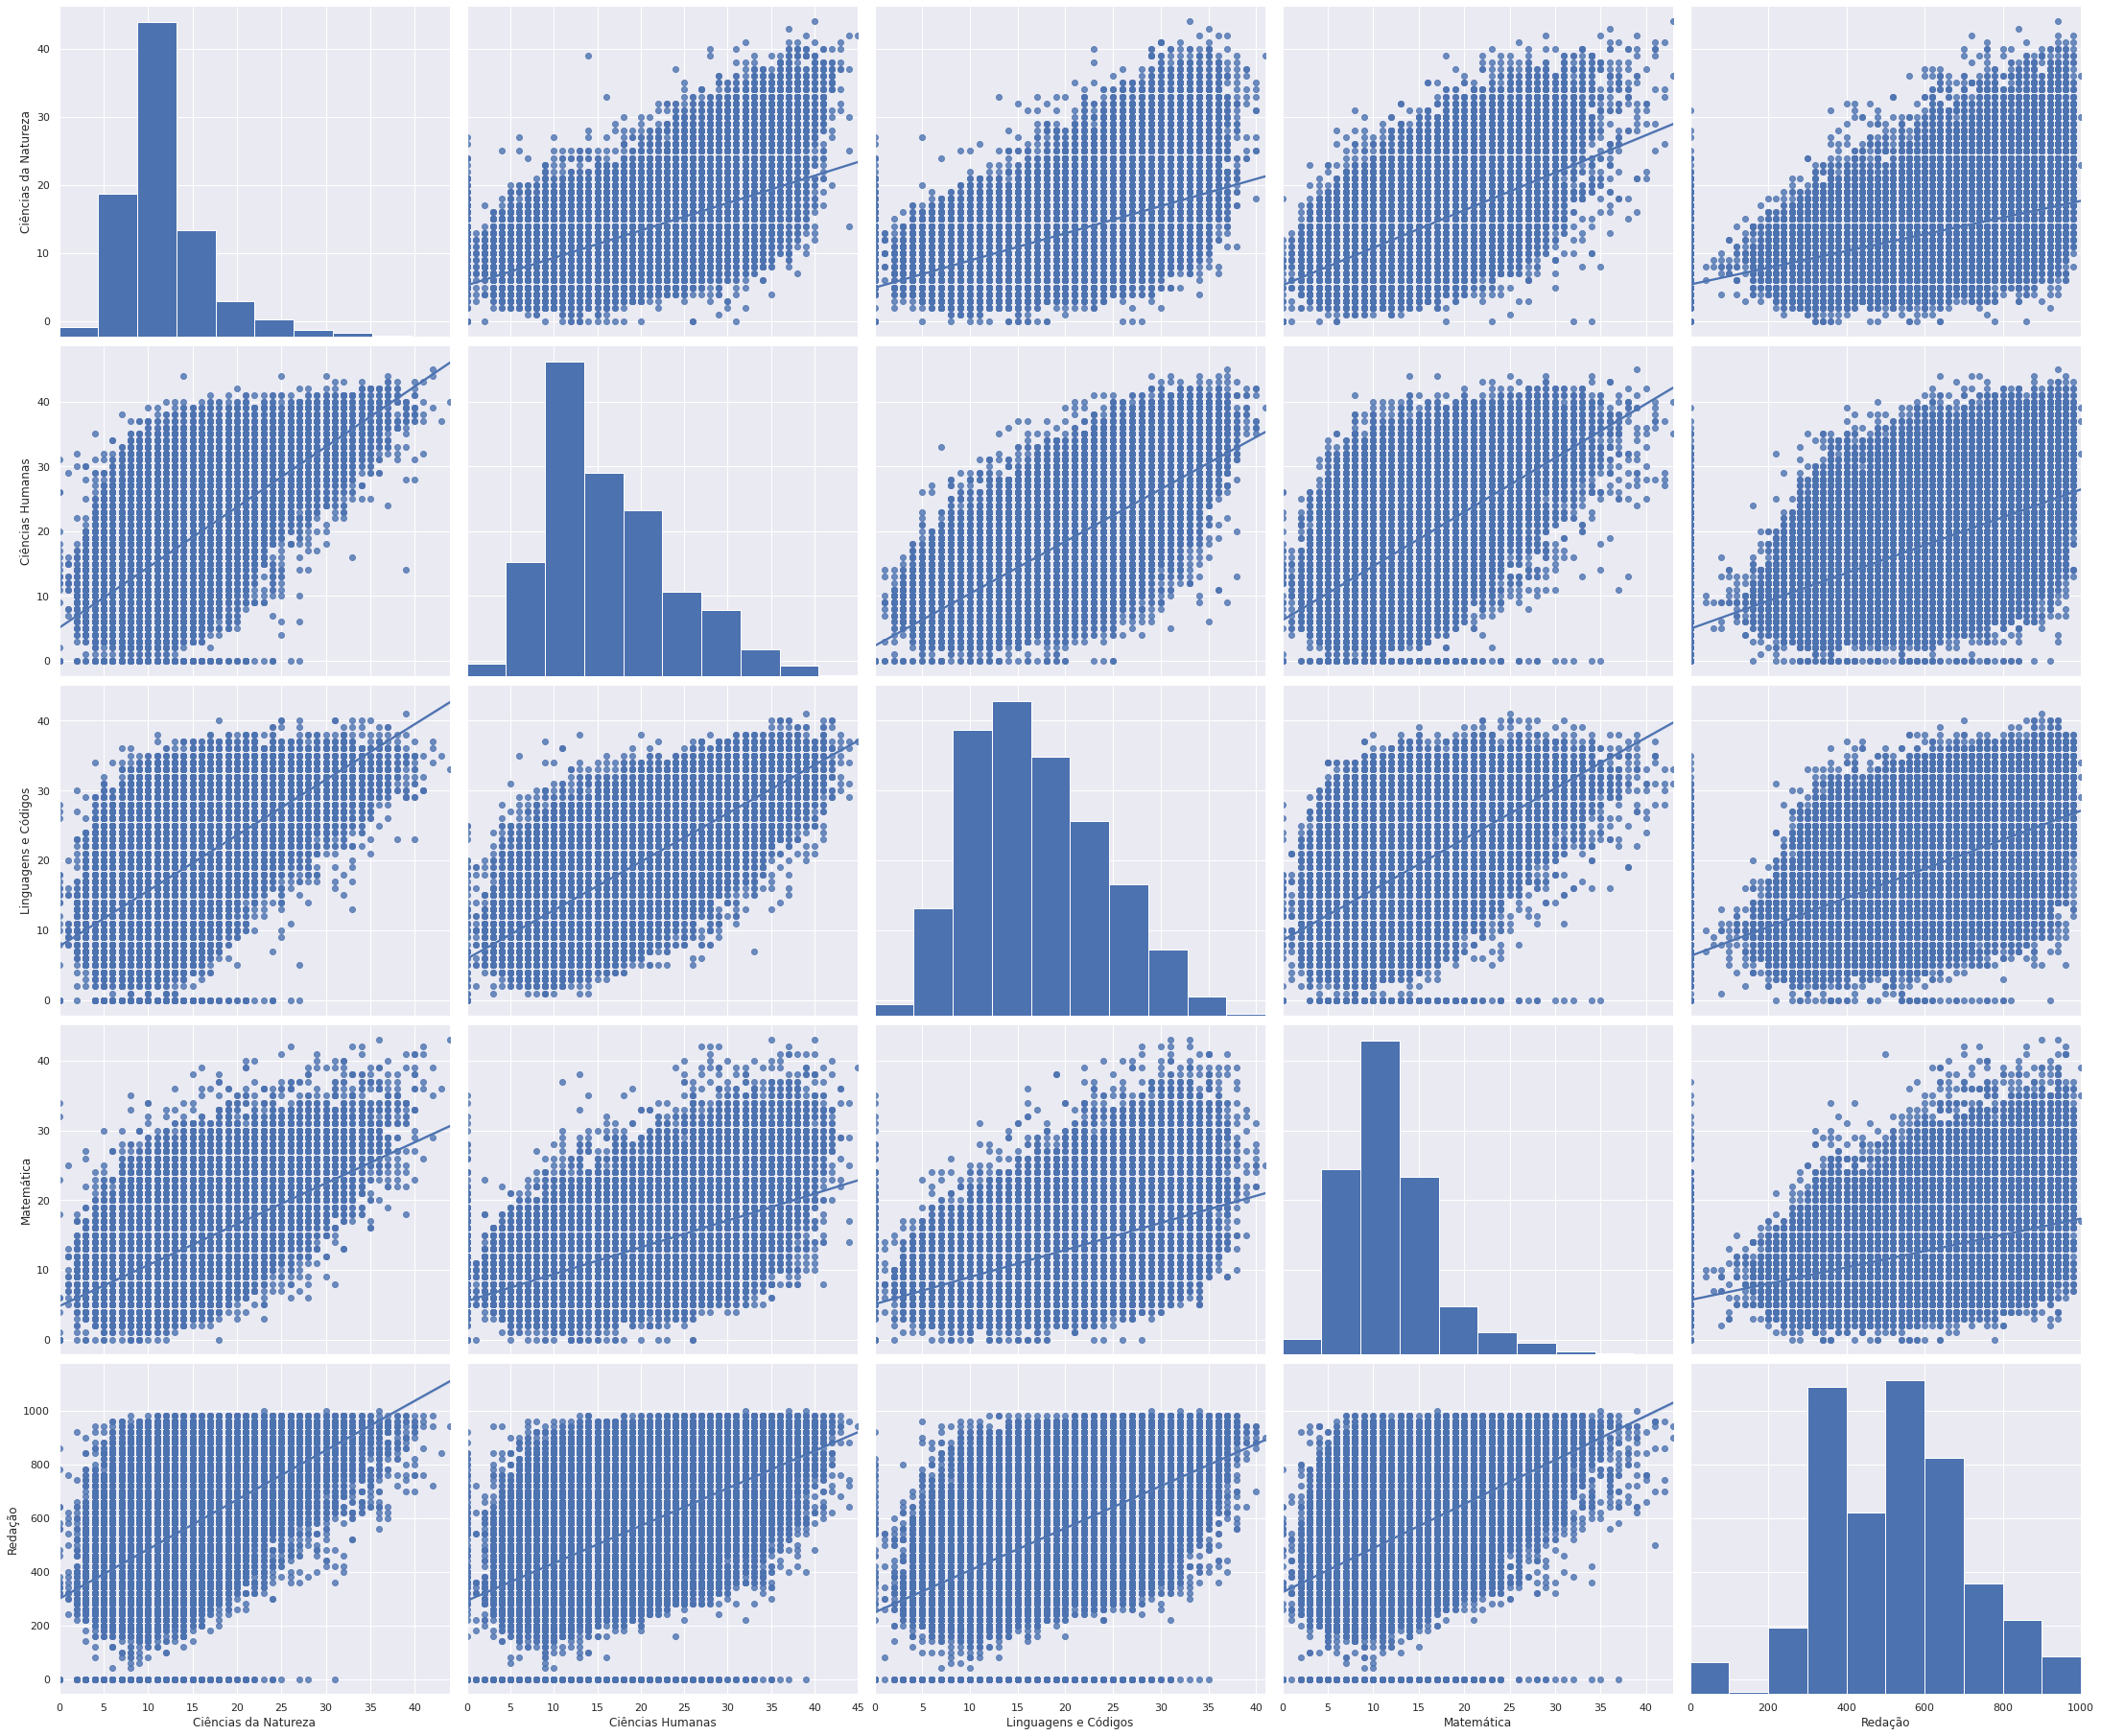

In [13]:
#@title Pairplot de cada matéria
sns.set(font_scale=1)
sns.pairplot(data = df_acertos_materia, kind='reg', height=5, aspect=1.2)
plt.show()

### Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)
Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [60]:
#@title Remove linhas com todas as notas zeradas.
df_notas = df_preparado_enem['NU_NOTA_CN	NU_NOTA_CH	NU_NOTA_LC	NU_NOTA_MT	NU_NOTA_REDACAO'.split()].copy()
df_notas = df_notas.loc[~df_notas.apply(lambda row: (row==0).all(), axis=1)]
df_notas.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO
1      523.10      671.30      661.60      738.00           680.00
2      409.20      531.70      389.00      438.10           600.00
3      452.30      505.50      448.50      544.90           400.00
6      428.50      505.20      521.00      436.80           560.00
8      491.80      575.70      524.40      487.60           660.00

### Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)
Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

In [21]:
#@title Imprime algumas possíveis anomalias no dataset.
print('Chama a atenção a questão {} da PROVA_MT_459 com {} acertos de {} estudantes.'.format(df_acertos_questoes_materias['CO_PROVA_MT_459'][df_acertos_questoes_materias['CO_PROVA_MT_459'].values == 0].index[0],df_acertos_questoes_materias['CO_PROVA_MT_459'][df_acertos_questoes_materias['CO_PROVA_MT_459'].values == 0].values[0], df_erros_questoes_materias['CO_PROVA_MT_459'].max()))
print('Chama a atenção a questão {} da PROVA_MT_460 com {} acertos de {} estudantes.'.format(df_acertos_questoes_materias['CO_PROVA_MT_460'][df_acertos_questoes_materias['CO_PROVA_MT_460'].values == 0].index[0],df_acertos_questoes_materias['CO_PROVA_MT_460'][df_acertos_questoes_materias['CO_PROVA_MT_460'].values == 0].values[0], df_erros_questoes_materias['CO_PROVA_MT_460'].max()))
print('Chama a atenção a questão {} da PROVA_MT_462 com {} acertos de {} estudantes.'.format(df_acertos_questoes_materias['CO_PROVA_MT_460'][df_acertos_questoes_materias['CO_PROVA_MT_462'].values == 0].index[0],df_acertos_questoes_materias['CO_PROVA_MT_462'][df_acertos_questoes_materias['CO_PROVA_MT_462'].values == 0].values[0], df_erros_questoes_materias['CO_PROVA_MT_462'].max()))

Chama a atenção a questão 28 da PROVA_MT_459 com 0 acertos de 24452 estudantes.
Chama a atenção a questão 15 da PROVA_MT_460 com 0 acertos de 24333 estudantes.
Chama a atenção a questão 35 da PROVA_MT_462 com 0 acertos de 24387 estudantes.


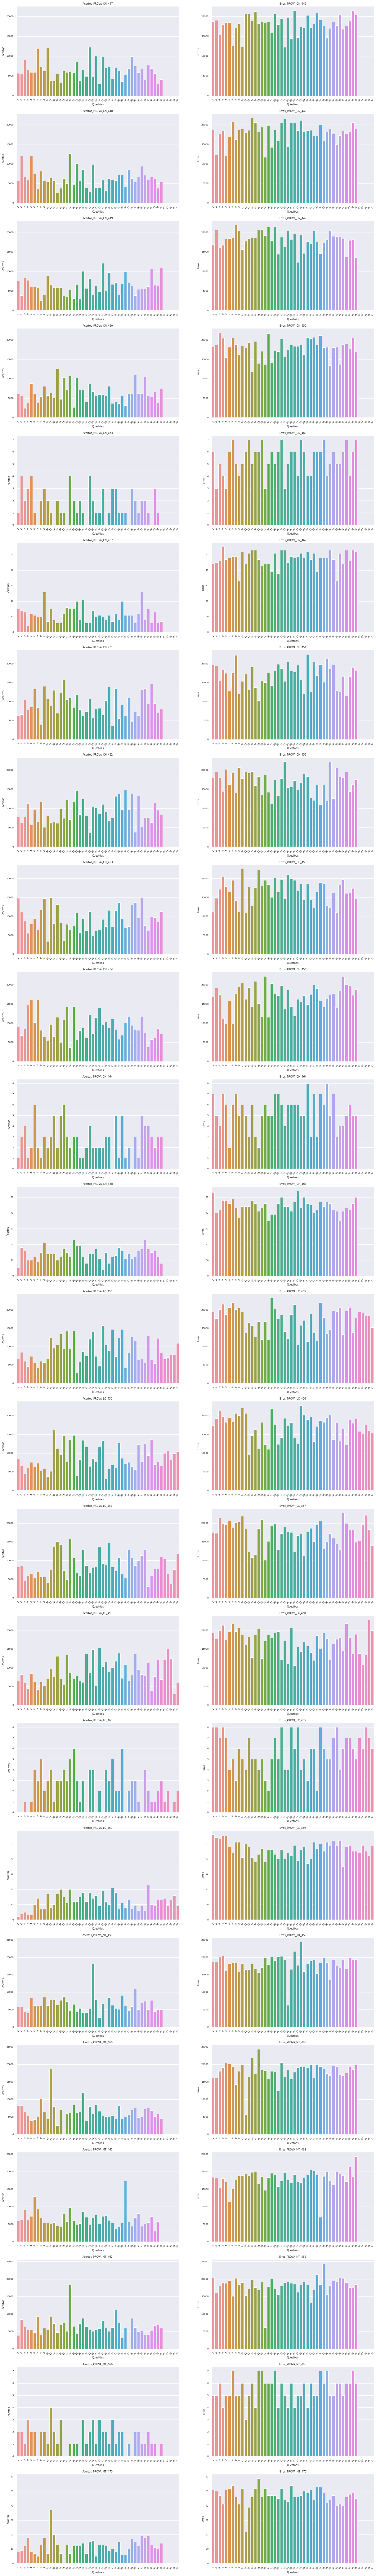

In [22]:
#@title Plota os gráficos de erros e acertos por tipo de prova / matéria.
plt.figure(figsize=(80,100))
sns.set(font_scale=.68)

l = 1
for i, col in enumerate(df_acertos_questoes_materias.columns):  
  ax = i
  ax = plt.subplot(len(df_acertos_questoes_materias.columns)*2,2,l)
  plt.title(f'Acertos_{col[3:]}')  
  plt.ylabel('Acertos')
  plt.xlabel('Questões')
  sns.barplot(y = df_acertos_questoes_materias[col].values, x=df_acertos_questoes_materias[col].index)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

  ax1 = i+1
  ax1 = plt.subplot(len(df_acertos_questoes_materias.columns)*2,2,l+1, sharey=ax)
  plt.title(f'Erros_{col[3:]}')
  plt.ylabel('Erros')
  plt.xlabel('Questões')
  sns.barplot(y = df_erros_questoes_materias[col].values, x=df_erros_questoes_materias[col].index)
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
  l+=2
plt.subplots_adjust(bottom=0.2, top=2.5, left=0.1, right=0.3)
plt.show()

###Desafio 6 do [Allan Spadini](https://twitter.com/allanspadini)
Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

O peso da nota da redação e questões mais "difíceis" dificultam a predição pelo fato da relatividade de dificuldade das questões que o Inep mensura, essa avaliação é feita por um sistema chamado Teoria de Resposta ao Item (TRI).
Basicamente pode-se dizer que as questões com mais acertos valem menos, ou seja, quanto menos estudantes acertarem a questão, mais ela vale.

In [0]:
#@title Cria os arquivos de acertos e notas para predições
data_ml = acertos_questoes.copy()

for nota in list(test.keys()):
  data_ml[nota] = data_ml[nota].join(df_notas[f'NU_NOTA_{nota[-6:-4]}'])
  data_ml[nota].to_csv (r'/content/drive/My Drive/CSVs_ENEM/{}.csv'.format(nota), index = False, header=True)
df_notas.to_csv (r'/content/drive/My Drive/CSVs_ENEM/df_notas.csv', index = False, header=True)

In [560]:
prim_quartil = df_notas.quantile(q = 0.25)
terc_quartil = df_notas.quantile(q=0.75)
ini = round(len(df_notas) / prim_quartil)
final = len(df_notas) - ini
ln_min = df_notas.iloc[ini]
ln_max = df_notas.iloc[final]
#df_notas[(df_notas[:]< menor)]
prim_quartil = df_notas.quantile(q = 0.25).mean()
df_notas.iloc[ln_min.mean()].mean()
media_padrao_materia = ln_min.mean()

NU_NOTA_CN        468.44
NU_NOTA_CH        564.86
NU_NOTA_LC        519.56
NU_NOTA_MT        495.96
NU_NOTA_REDACAO   372.00
dtype: float64

##Sessão de Machine learning
### Predição das notas de 'linguagem_codigo'

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing, metrics

np.random.seed(43267)
minmax_scale = preprocessing.MinMaxScaler()
slice_df = int(df_notas.shape[0]//9*8)

df_train_test = df_notas['NU_NOTA_CN	NU_NOTA_CH	NU_NOTA_MT	NU_NOTA_REDACAO NU_NOTA_LC'.split()][:slice_df].copy()

for col in list(df_train_test.columns):
  df_train_test.loc[df_train_test[col].isin([0]), col] = ini[col].min()

df_train_test = minmax_scale.fit_transform(df_train_test)

X = df_train_test[:,:-1]
y = df_train_test[:,-1]

df_validation = minmax_scale.fit_transform(df_notas['NU_NOTA_CN	NU_NOTA_CH	NU_NOTA_MT	NU_NOTA_REDACAO NU_NOTA_LC'.split()][slice_df:])
df_validation_data = df_validation[:,:-1]#['NU_NOTA_CN	NU_NOTA_CH	NU_NOTA_MT	NU_NOTA_REDACAO'.split()]
df_validation_target = df_validation[:,-1]#['NU_NOTA_LC']


In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size = 0.33)

linearSVR = LinearSVR(dual=False, tol=1e-7, loss='squared_epsilon_insensitive')
linearSVR.fit(X_train, y_train, sample_weight=X_train[:,1])

LinearSVR(C=1.0, dual=False, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='squared_epsilon_insensitive',
          max_iter=1000, random_state=None, tol=1e-07, verbose=0)

In [263]:
print(f'Lista de coeficientes = {str(linearSVR.coef_).strip("[]")}\nConstante = {linearSVR.intercept_[0]}\nNúmero de iterações entre as classes = {linearSVR.n_iter_}')

Lista de coeficientes = 0.07001078 0.557093   0.07136659 0.15958533
Constante = 0.09987594005360662
Número de iterações entre as classes = 4


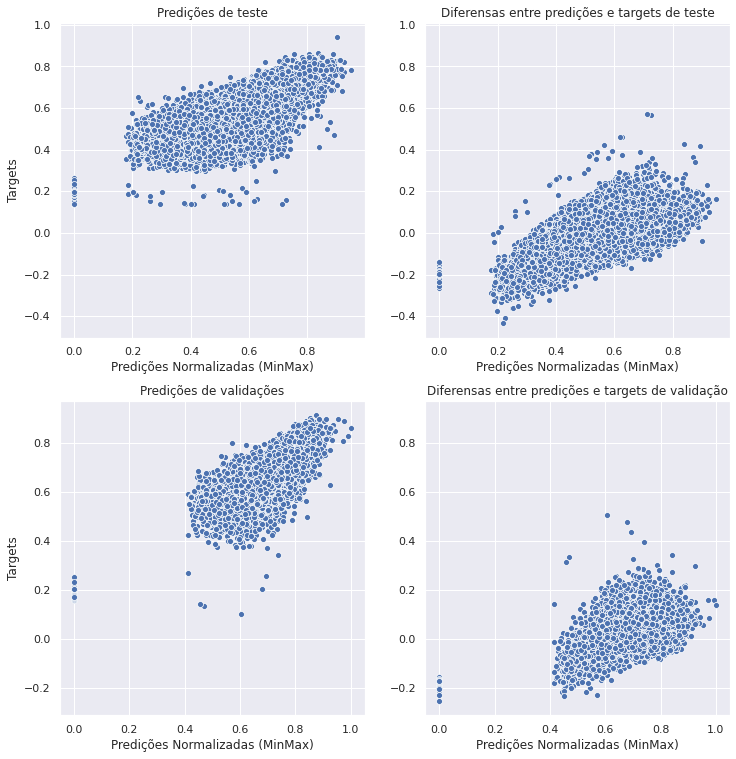

In [248]:
#@title Plots das predições Linear SVR
plt.figure(figsize=(12,12))
sns.set(font_scale=1)

plt.subplot(421)
ax1 = sns.scatterplot(x=y_test, y=test_predict)
ax1.set_title('Predições de teste')
ax1.set_xlabel('Predições Normalizadas (MinMax)')
ax1.set_ylabel('Targets')

ax2 = plt.subplot(422, sharey=ax1)
ax2 = sns.scatterplot(x=y_test, y=y_test - test_predict)
ax2.set_title('Diferensas entre predições e targets de teste')
ax2.set_xlabel('Predições Normalizadas (MinMax)')

plt.subplot(423)
ax3 = sns.scatterplot(x=df_validation_target, y=predictions)
ax3.set_title('Predições de validações')
ax3.set_xlabel('Predições Normalizadas (MinMax)')
ax3.set_ylabel('Targets')

plt.subplot(424, sharey=ax3)
ax4 = sns.scatterplot(x=df_validation_target, y=df_validation_target - predictions)
ax4.set_title('Diferensas entre predições e targets de validação')
ax4.set_xlabel('Predições Normalizadas (MinMax)')
plt.subplots_adjust(top=1.8)
plt.show()

In [271]:
modelo = DecisionTreeRegressor()
modelo.fit(X_train, y_train, sample_weight=X_train[:,-1])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
tree_predict = modelo.predict(X_test)
tree_prediction = modelo.predict(df_validation_data)

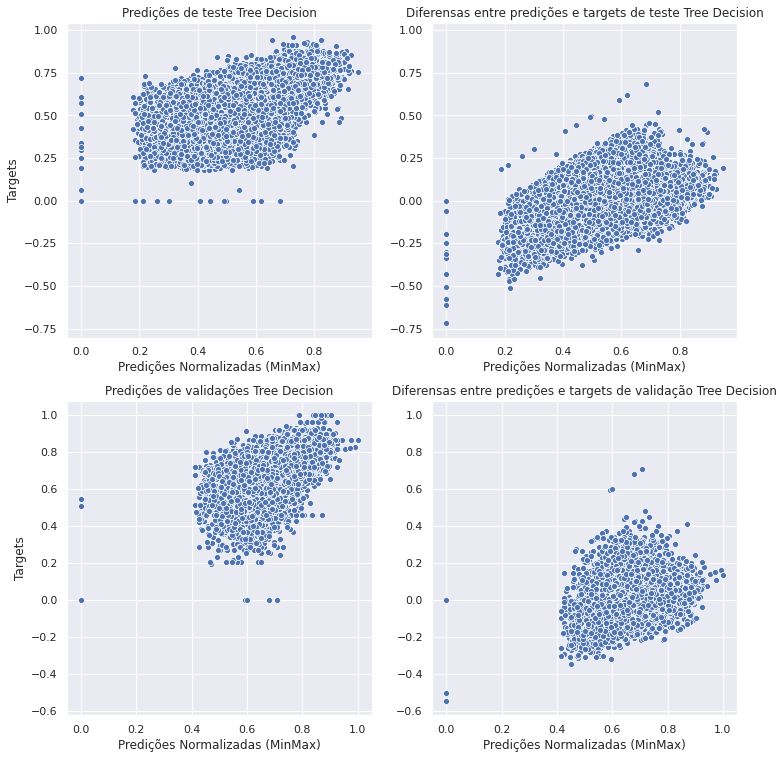

In [431]:
#@title Plots das predições Tree Decision
plt.figure(figsize=(12,12))
sns.set(font_scale=1)

plt.subplot(421)
ax1 = sns.scatterplot(x=y_test, y=tree_predict)
ax1.set_title('Predições de teste Tree Decision')
ax1.set_xlabel('Predições Normalizadas (MinMax)')
ax1.set_ylabel('Targets')

ax2 = plt.subplot(422, sharey=ax1)
ax2 = sns.scatterplot(x=y_test, y=y_test - tree_predict)
ax2.set_title('Diferensas entre predições e targets de teste Tree Decision')
ax2.set_xlabel('Predições Normalizadas (MinMax)')

plt.subplot(423)
ax3 = sns.scatterplot(x=df_validation_target, y=tree_prediction)
ax3.set_title('Predições de validações Tree Decision')
ax3.set_xlabel('Predições Normalizadas (MinMax)')
ax3.set_ylabel('Targets')

plt.subplot(424, sharey=ax3)
ax4 = sns.scatterplot(x=df_validation_target, y=df_validation_target - tree_prediction)
ax4.set_title('Diferensas entre predições e targets de validação Tree Decision')
ax4.set_xlabel('Predições Normalizadas (MinMax)')
plt.subplots_adjust(top=1.8)
plt.show()

In [417]:
reg_SGD = SGDRegressor(loss='huber',epsilon=0.4,alpha=1e-6,l1_ratio=0.1,penalty='l1',tol=1e-12)
reg_SGD.fit(X_train, y_train, sample_weight=X_train[:,-1])

SGDRegressor(alpha=1e-06, average=False, early_stopping=False, epsilon=0.4,
             eta0=0.01, fit_intercept=True, l1_ratio=0.1,
             learning_rate='invscaling', loss='huber', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
             shuffle=True, tol=1e-12, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [0]:
reg_SGD_test = reg_SGD.predict(X_test)
reg_SGD_predict = reg_SGD.predict(df_validation_data)

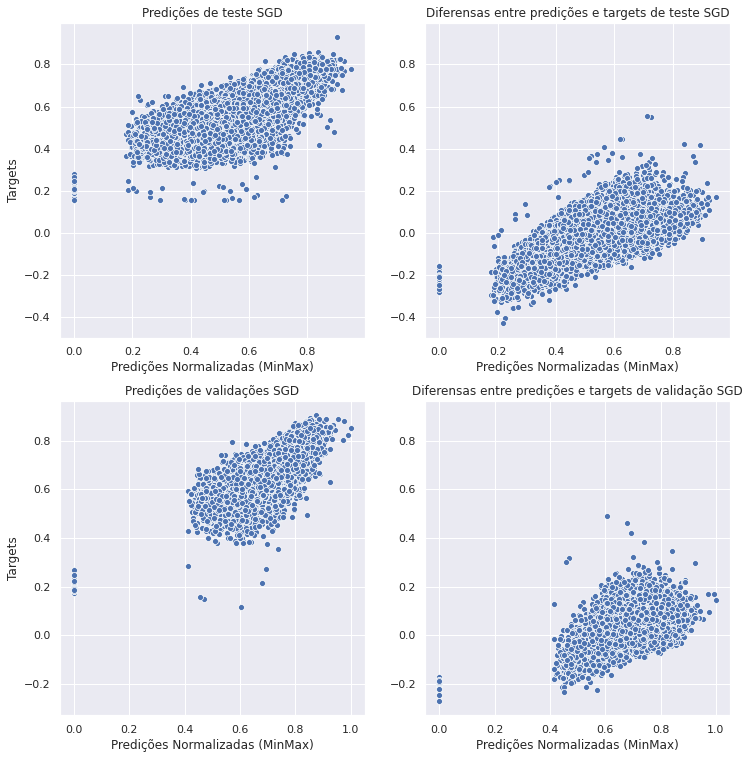

In [430]:
#@title Plots das predições Tree Decision
plt.figure(figsize=(12,12))
sns.set(font_scale=1)

plt.subplot(421)
ax1 = sns.scatterplot(x=y_test, y=reg_SGD_test)
ax1.set_title('Predições de teste SGD')
ax1.set_xlabel('Predições Normalizadas (MinMax)')
ax1.set_ylabel('Targets')

ax2 = plt.subplot(422, sharey=ax1)
ax2 = sns.scatterplot(x=y_test, y=y_test - reg_SGD_test)
ax2.set_title('Diferensas entre predições e targets de teste SGD')
ax2.set_xlabel('Predições Normalizadas (MinMax)')

plt.subplot(423)
ax3 = sns.scatterplot(x=df_validation_target, y=reg_SGD_predict)
ax3.set_title('Predições de validações SGD')
ax3.set_xlabel('Predições Normalizadas (MinMax)')
ax3.set_ylabel('Targets')

plt.subplot(424, sharey=ax3)
ax4 = sns.scatterplot(x=df_validation_target, y=df_validation_target - reg_SGD_predict)
ax4.set_title('Diferensas entre predições e targets de validação SGD')
ax4.set_xlabel('Predições Normalizadas (MinMax)')
plt.subplots_adjust(top=1.8)

In [425]:
#@title Compara resultados Linear SVR
test_predict = linearSVR.predict(X_test)
predictions = linearSVR.predict(df_validation_data)
squared_error = metrics.mean_squared_error(df_validation_target, predictions)
absolute_error = 	metrics.mean_absolute_error(df_validation_target, predictions)
variance_score = metrics.explained_variance_score(df_validation_target, predictions)
score = linearSVR.score(df_validation_data, df_validation_target, sample_weight=df_validation_data[:,-1])
print(f'MSE = {round(squared_error, 4)} \nMAE = {round(absolute_error, 4)}\nVariance Score = {round(variance_score, 4)}\nCoef. R^2 da previsão = {round(score, 4)}')

MSE = 0.0058 
MAE = 0.0601
Variance Score = 0.5516
Coef. R^2 da previsão = 0.4217


In [426]:
#@title Compara resultados Decision Tree

squared_error_Tree = metrics.mean_squared_error(df_validation_target, tree_prediction)
absolute_error_Tree = 	metrics.mean_absolute_error(df_validation_target, tree_prediction)
variance_score_Tree = metrics.explained_variance_score(df_validation_target, tree_prediction)
score_Tree = modelo.score(df_validation_data, df_validation_target, sample_weight=df_validation_data[:,-1])
print(f'MSE = {round(squared_error_Tree, 4)} \nMAE = {round(absolute_error_Tree, 4)}\nVariance Score = {round(variance_score_Tree, 4)}\nCoef. R^2 da previsão = {round(variance_score_Tree, 4)}')

MSE = 0.0093 
MAE = 0.0735
Variance Score = 0.0718
Coef. R^2 da previsão = 0.0718


In [427]:
#@title Compara resultados Regression SGD
squared_error_SGD = metrics.mean_squared_error(df_validation_target, reg_SGD_predict)
absolute_error_SGD = 	metrics.mean_absolute_error(df_validation_target, reg_SGD_predict)
variance_score_SGD = metrics.explained_variance_score(df_validation_target, reg_SGD_predict)
score_SGD = reg_SGD.score(df_validation_data, df_validation_target, sample_weight=df_validation_data[:,-1])
print(f'MSE = {round(squared_error_SGD, 4)} \nMAE = {round(absolute_error_SGD, 4)}\nVariance Score = {round(variance_score_SGD, 4)}\nCoef. R^2 da previsão = {round(variance_score_SGD, 4)}')

MSE = 0.0059 
MAE = 0.0613
Variance Score = 0.5559
Coef. R^2 da previsão = 0.5559


In [432]:
#@title Cross validation dos modelos
cross_val_score_L_SVR = cross_val_score(linearSVR, X, y, cv=10)
cross_val_score_Tree = cross_val_score(modelo, X, y, cv=10)
cross_val_score_regSGD= cross_val_score(reg_SGD, X, y, cv=10)

print(f'Cross validation Linear SVR\n{cross_val_score_L_SVR}\n')
print(f'Cross validation Tree Decision\n{cross_val_score_Tree}\n')
print(f'Cross validation Regression SGR\n{cross_val_score_regSGD}\n')

Cross validation Linear SVR
[0.58712899 0.57676133 0.58375048 0.5761113  0.57081656 0.57714296
 0.57107266 0.58010883 0.57030628 0.59111904]

Cross validation Tree Decision
[0.24833408 0.23239317 0.21152992 0.23106729 0.2298897  0.24657064
 0.21343946 0.24152291 0.22429084 0.2611395 ]

Cross validation Regression SGR
[0.58713806 0.57681174 0.58362718 0.57607373 0.57083051 0.57715471
 0.57066908 0.58006307 0.57033202 0.59111538]



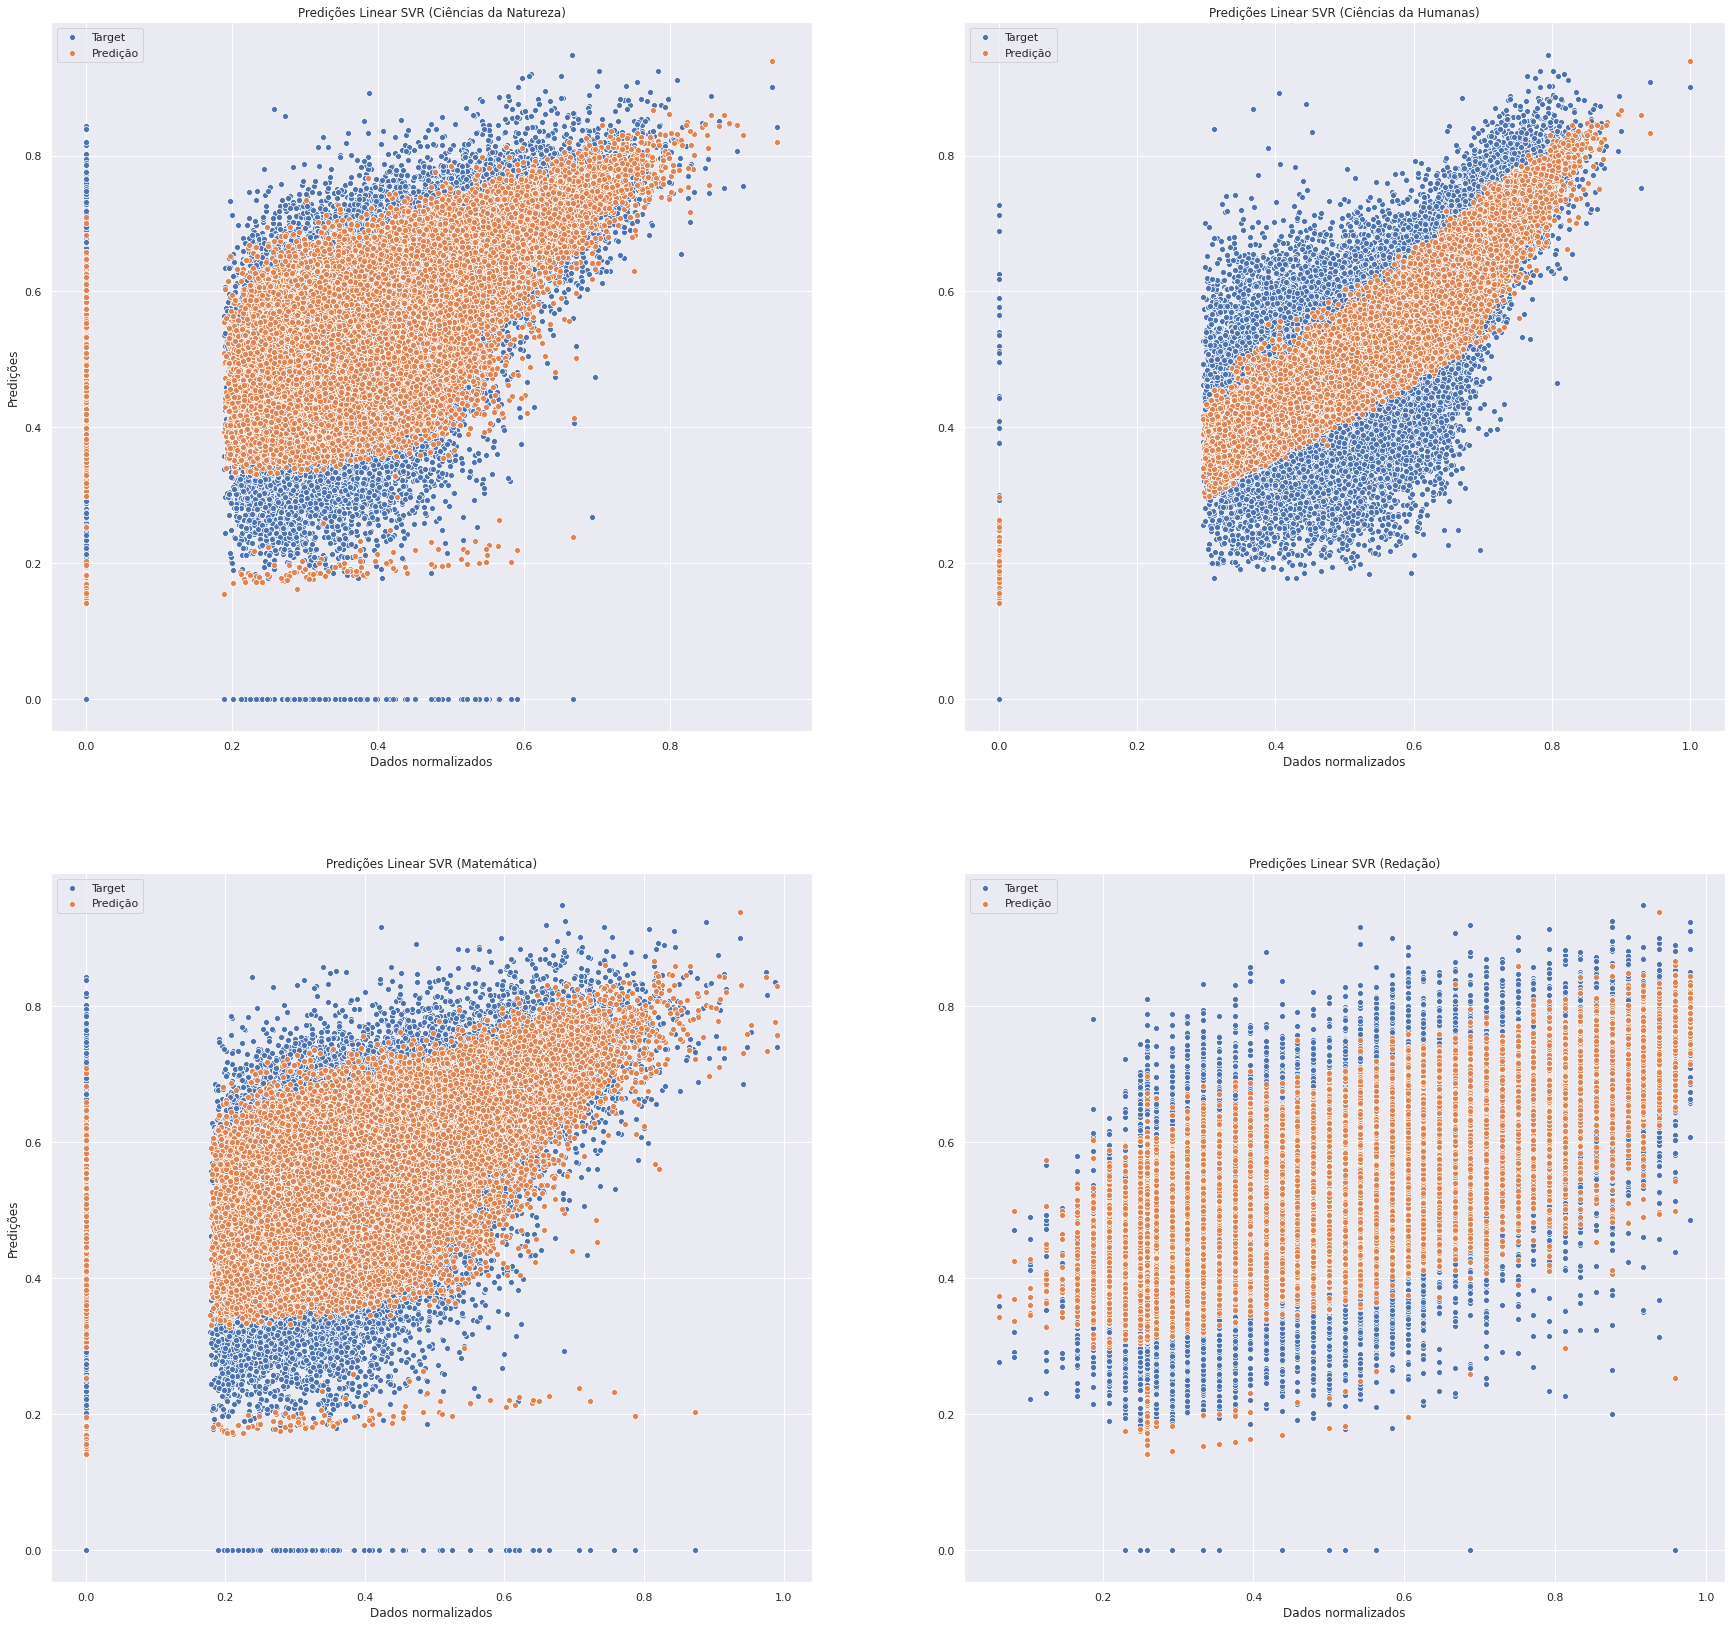

In [552]:
#@title Plots das predições Linear SVR
fig = plt.figure(figsize=(30,60))
sns.set(font_scale=1)
kwargs = {'labels':['Target', 'Predição']},{'xlabel':'Dados normalizados'},{'ylabel':'Predições'}

ax1 = fig.add_subplot(421)
sns.scatterplot(x=X_test[:,0], y=y_test)
sns.scatterplot(x=X_test[:,0], y=test_predict)
plt.xlabel('Dados normalizados')

ax2 = fig.add_subplot(422, sharey=ax1)
sns.scatterplot(x=X_test[:,1], y=y_test)
sns.scatterplot(x=X_test[:,1], y=test_predict)

ax3 = fig.add_subplot(423)
sns.scatterplot(x=X_test[:,2], y=y_test)  
sns.scatterplot(x=X_test[:,2], y=test_predict)

ax4 = fig.add_subplot(424, sharey=ax3)
sns.scatterplot(x=X_test[:,3], y=y_test)
sns.scatterplot(x=X_test[:,3], y=test_predict)

ax1.title.set_text('Predições Linear SVR (Ciências da Natureza)')
ax3.title.set_text('Predições Linear SVR (Matemática)')
ax2.title.set_text('Predições Linear SVR (Ciências da Humanas)')
ax4.title.set_text('Predições Linear SVR (Redação)')

ax1.set_xlabel(**kwargs[1])
ax2.set_xlabel(**kwargs[1])
ax3.set_xlabel(**kwargs[1])
ax4.set_xlabel(**kwargs[1])

ax1.set_ylabel(**kwargs[2])
ax3.set_ylabel(**kwargs[2])

ax1.legend(**kwargs[0])
ax2.legend(**kwargs[0])
ax3.legend(**kwargs[0])
ax4.legend(**kwargs[0])

plt.show()

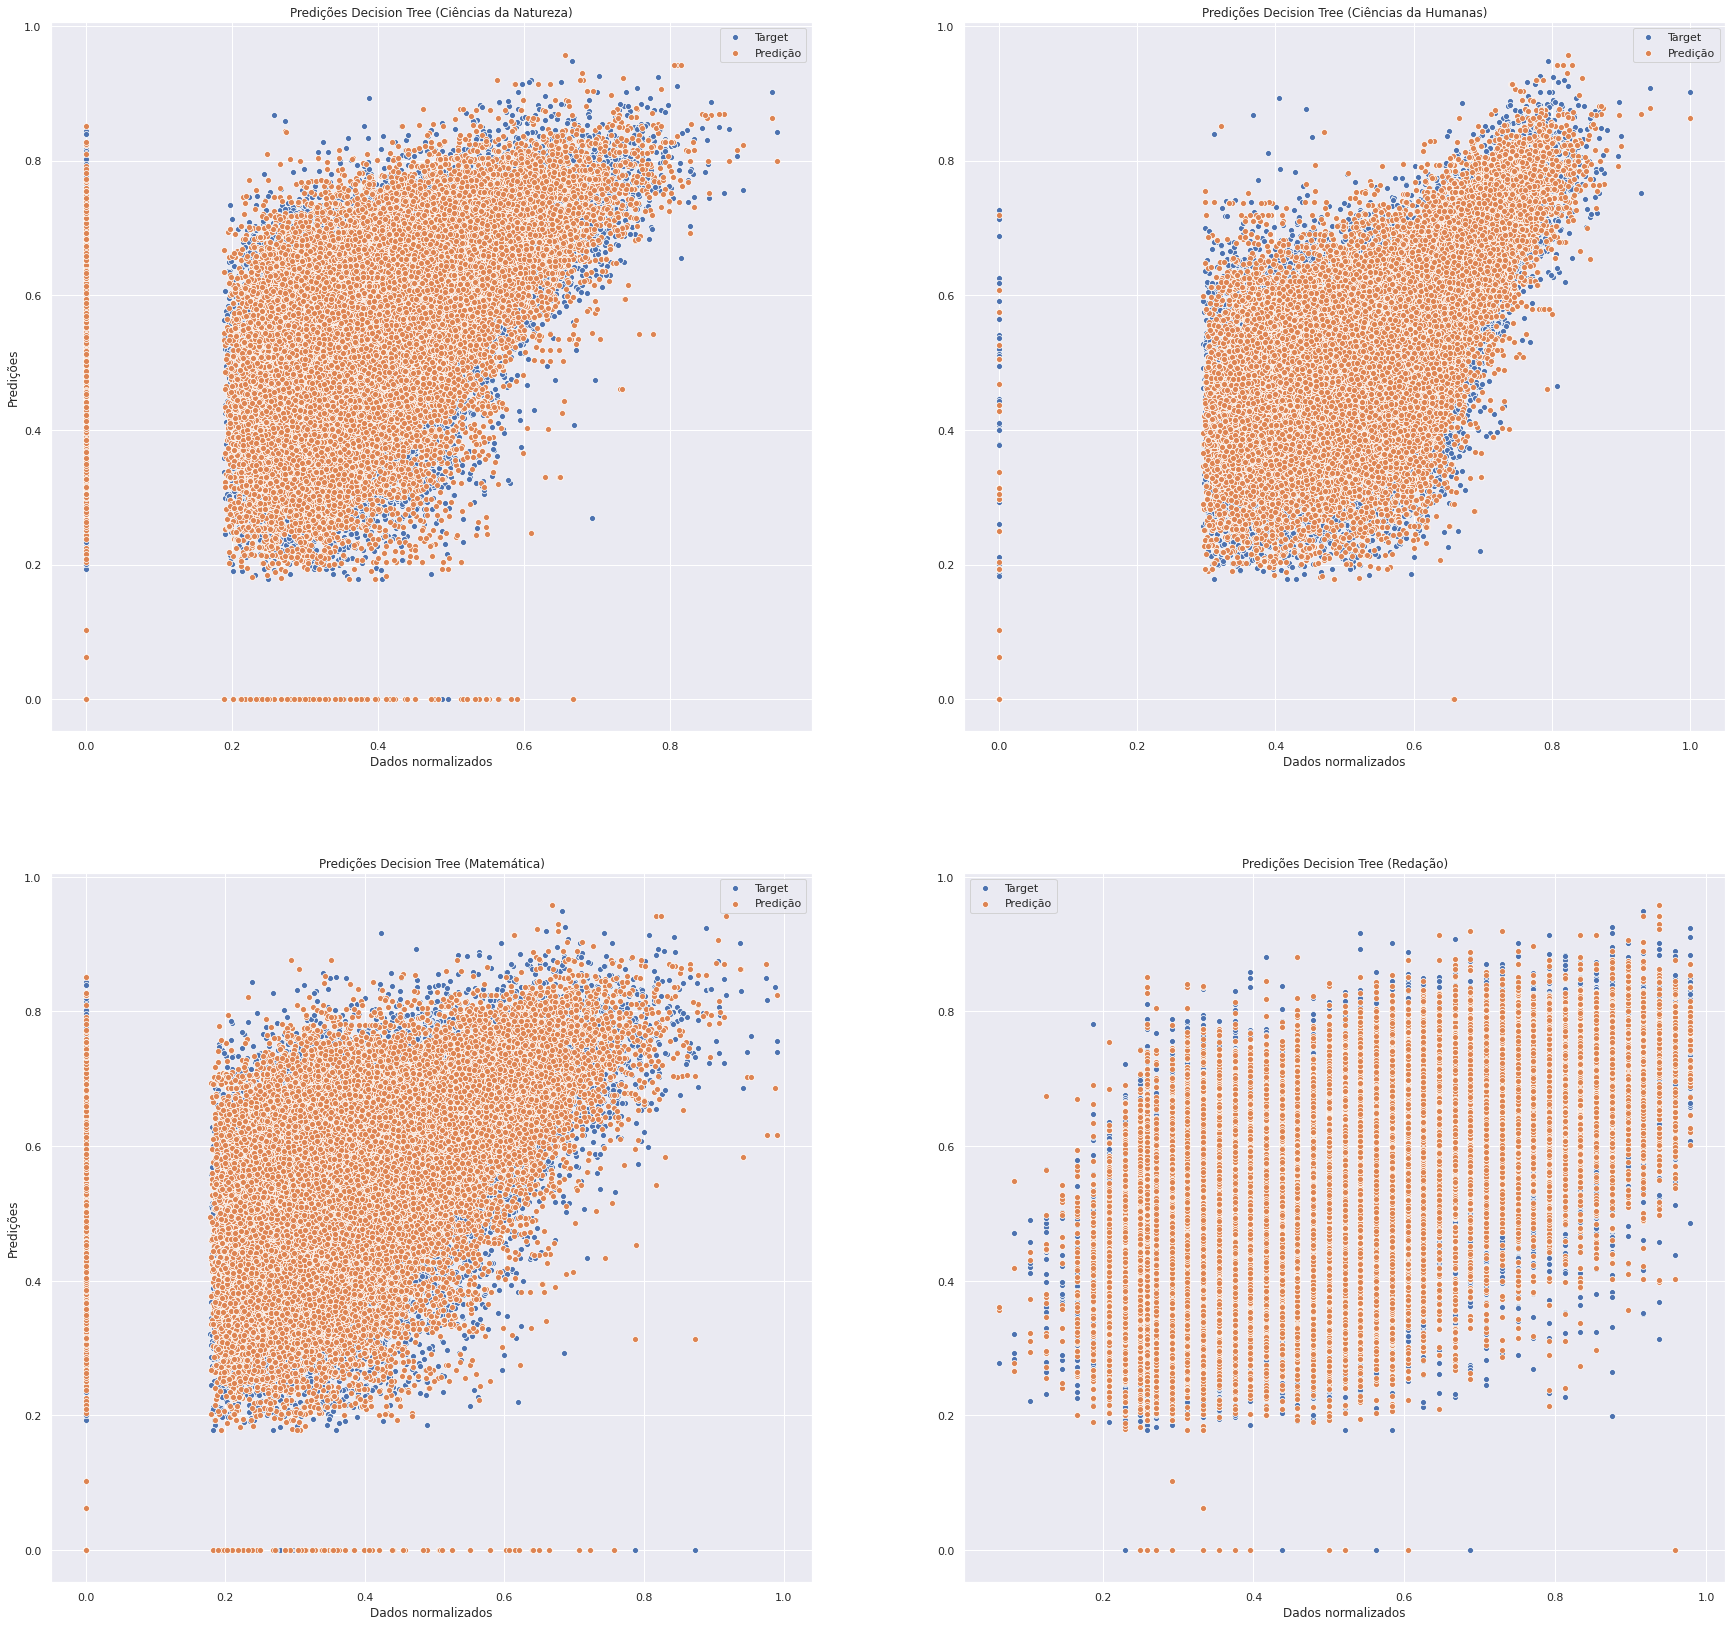

In [547]:
#@title Plots das predições Decision Tree
fig = plt.figure(figsize=(30,60))
sns.set(font_scale=1)
kwargs = {'labels':['Target', 'Predição']},{'xlabel':'Dados normalizados'},{'ylabel':'Predições'}

ax1 = fig.add_subplot(421)
sns.scatterplot(x=X_test[:,0], y=y_test)
sns.scatterplot(x=X_test[:,0], y=tree_predict)
plt.xlabel('Dados normalizados')

ax2 = fig.add_subplot(422, sharey=ax1)
sns.scatterplot(x=X_test[:,1], y=y_test)
sns.scatterplot(x=X_test[:,1], y=tree_predict)

ax3 = fig.add_subplot(423)
sns.scatterplot(x=X_test[:,2], y=y_test)  
sns.scatterplot(x=X_test[:,2], y=tree_predict)

ax4 = fig.add_subplot(424, sharey=ax3)
sns.scatterplot(x=X_test[:,3], y=y_test)
sns.scatterplot(x=X_test[:,3], y=tree_predict)

ax1.title.set_text('Predições Decision Tree (Ciências da Natureza)')
ax3.title.set_text('Predições Decision Tree (Matemática)')
ax2.title.set_text('Predições Decision Tree (Ciências da Humanas)')
ax4.title.set_text('Predições Decision Tree (Redação)')

ax1.set_xlabel(**kwargs[1])
ax2.set_xlabel(**kwargs[1])
ax3.set_xlabel(**kwargs[1])
ax4.set_xlabel(**kwargs[1])

ax1.set_ylabel(**kwargs[2])
ax3.set_ylabel(**kwargs[2])

ax1.legend(**kwargs[0])
ax2.legend(**kwargs[0])
ax3.legend(**kwargs[0])
ax4.legend(**kwargs[0])

plt.show()

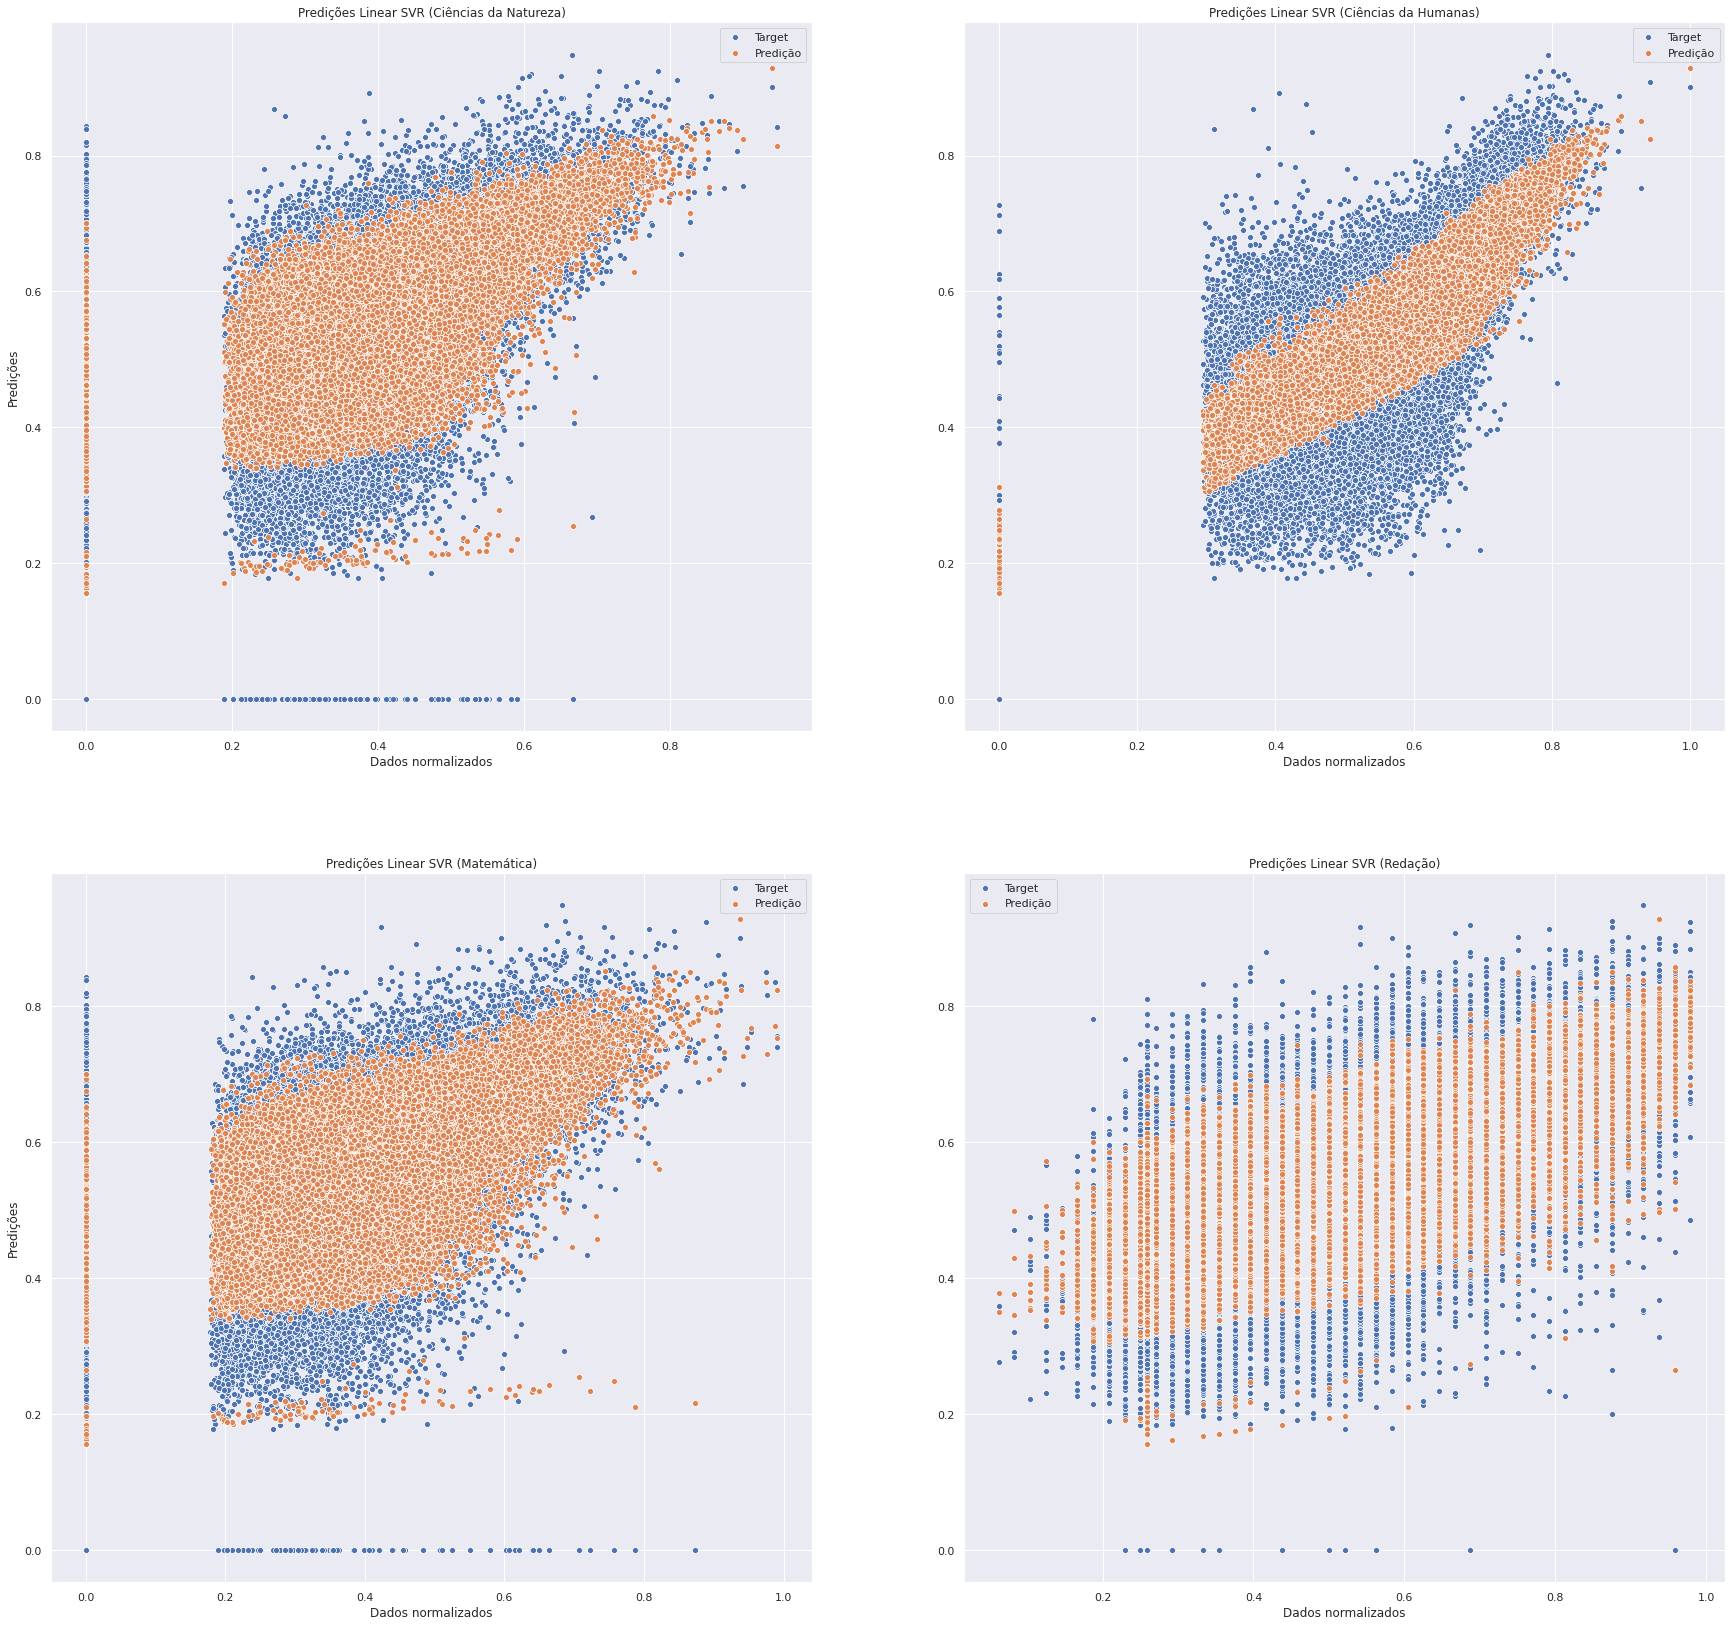

In [551]:
#@title Plots das predições Regression SGD
fig = plt.figure(figsize=(30,60))
sns.set(font_scale=1)
kwargs = {'labels':['Target', 'Predição']},{'xlabel':'Dados normalizados'},{'ylabel':'Predições'}

ax1 = fig.add_subplot(421)
sns.scatterplot(x=X_test[:,0], y=y_test)
sns.scatterplot(x=X_test[:,0], y=reg_SGD_test)
plt.xlabel('Dados normalizados')

ax2 = fig.add_subplot(422, sharey=ax1)
sns.scatterplot(x=X_test[:,1], y=y_test)
sns.scatterplot(x=X_test[:,1], y=reg_SGD_test)

ax3 = fig.add_subplot(423)
sns.scatterplot(x=X_test[:,2], y=y_test)  
sns.scatterplot(x=X_test[:,2], y=reg_SGD_test)

ax4 = fig.add_subplot(424, sharey=ax3)
sns.scatterplot(x=X_test[:,3], y=y_test)
sns.scatterplot(x=X_test[:,3], y=reg_SGD_test)

ax1.title.set_text('Predições Linear SVR (Ciências da Natureza)')
ax3.title.set_text('Predições Linear SVR (Matemática)')
ax2.title.set_text('Predições Linear SVR (Ciências da Humanas)')
ax4.title.set_text('Predições Linear SVR (Redação)')

ax1.set_xlabel(**kwargs[1])
ax2.set_xlabel(**kwargs[1])
ax3.set_xlabel(**kwargs[1])
ax4.set_xlabel(**kwargs[1])

ax1.set_ylabel(**kwargs[2])
ax3.set_ylabel(**kwargs[2])

ax1.legend(**kwargs[0])
ax2.legend(**kwargs[0])
ax3.legend(**kwargs[0])
ax4.legend(**kwargs[0])

plt.show()